# Lab session 1:: Linear Regression: Python Scripting via Jupyter Notebook

### Student:VAMSHI KODIPAKA                                                       
### Submitted to : Prof. Yifei ZHANG

### Date:22-MAR-2019

## I. Introduction
In this exercise, we will implement linear regression with one and multiple variables, as well as gradient descent.

# II. Linear regression with one variable
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new food truck. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next. The file lab1data1.txt contains the dataset: the first column is the poplulation of a city and the second column is the profit of a food truck in that city. An negative value for profit indicates a loss.

### Solution Question 1

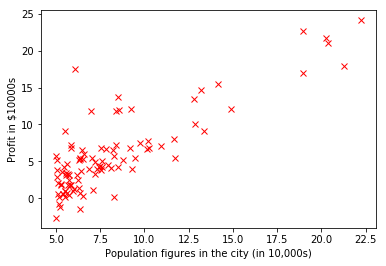

In [40]:
# NumPy package is used to perform different operations.
# It is a multidimensional array used to store values of same datatype.

import numpy as np 

# matplotlib inline 
import matplotlib.pyplot as plt
# creates a figure, creates a plotting area in a figure, plots some lines in a plotting area

# loading data from a text file
def plotData(X,y):
    plt.plot(X,y,'rx')                                             # Plot the data
    plt.xlabel('Population figures in the city (in 10,000s)')      # X-Label given
    plt.ylabel('Profit in $10000s')                                # Y-Label given         
    plt.show()                                                     # Display a figure.

data = np.loadtxt(fname='data/lab1data1.txt', delimiter=',') 
#Every element of the fileis separated here by a dilimiter

X=data[:,:-1]           # Reading data of X-column(s)
y=data[:,1]             # Reading data of Y-colum

plotData(X,y)           # Plotting X verses y

### Solution Question 2

In [41]:
# Linear Regression with one variable  ----> y=w0 + w1*x

# Now we get X and y, writing function LinearReg(X,y) to find w
# Least Square Method, ex: np.linalg.lstsq(X,y)
# note:  you should add one dimension to each input variable to take care of the bias term
# ex :
# intercept = np.ones((X.shape[0],1))
# X = np.asmatrix(np.hstack(intercept,X))
# also, you can print the results out to see the difference


def LinearReg(X, y, intercept=False):                     #  function definition for LinearReg
    if intercept:                                         #  find intercept exists
        X_ = np.asmatrix(X)                               #  if intercept exsists convert X into a matrix
    else:
        intercept_array = np.ones((X.shape[0],1))         #  intercept vector with all ones
        X_ = np.asmatrix(np.hstack((intercept_array,X)))  #  assigning the intercept vector to the X matrix
    w, _, _,_ = np.linalg.lstsq(X_,y,rcond=None)          #  using linear Least square inbuilt function to find w
    return w

intercept = False
w = LinearReg(X,y,intercept)                              #  User-defined LinearReg Function
print(w)                                                  #  print weight vector w

[-3.89578088  1.19303364]


### Solution Question 3

In [42]:
def predict(X,w, intercept=False):                        #  function definition for predict
    if intercept:                                         #  find intercept exists or not
        X_ =np.asmatrix(X)                                #  if intercept exsists convert X into a matrix
    else:
        intercept_array = np.ones((X.shape[0],1))         #  intercept vector with all ones
        X_ = np.asmatrix(np.hstack((intercept_array, X))) #  assigning the intercept vector to the X matrix
    w= np.matrix(np.atleast_2d(w).T)                      #  making weight vector transpose
    print(X_)                                             #  print X_
    return np.ravel(X_ * w)

In [43]:
X_test =np.asmatrix([[3.5000],[7.0000]])                  #  Test input vector
y_predict = predict(X_test,w)                             #  Calling predict
print(y_predict)                                          #  print predicted value using previous weights

[[1.  3.5]
 [1.  7. ]]
[0.27983688 4.45545463]


# III. Linear regression with multiple variables
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to collect information on recent houses sold and make a model of housing prices.
The file lab1data2.txt contains a training set of housing prices in a city. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house.

### Solution Question 1

In [44]:
# Linear regression with multiple variables

In [45]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace, mean, std, arange #  importing various libraries
from mpl_toolkits.mplot3d import Axes3D                                              #  importing Axes3D 
import matplotlib.pyplot as plt                                                      #  importing plt
from pylab import plot, show, xlabel, ylabel                                         #  importing plot functions

In [46]:
## Adapt your function Linear Reg to estimate w for any dimension

In [47]:
# linear regression with multiple variable  ----> y=w0 + w1*x +w2*x

# Now we get X and y, please write function LinearReg(Xn,y) to find w
# Least Square Method, ex: np.linalg.lstsq(X,y)
# note:  youyou should add one dimension to each input variable to take care of the bias term
# ex :
# intercept = np.ones((X.shape[0],1))
# X = np.asmatrix(np.hstack(intercept,X))
# you can print the results out to see the difference


def LinearReg(X, y, intercept=False):                        # Function definition for LinearReg
    if intercept:                                            # find intercept exists or not
        X_ = np.asmatrix(X)                                  # if intercept exsists convert X into a matrix
    else:
        intercept_array = np.ones((X.shape[0],1))            # intercept vector with all ones
        X_ = np.asmatrix(np.hstack((intercept_array,X)))     # assigning the intercept vector to the X matrix
    w, _, _,_ = np.linalg.lstsq(X_,y,rcond=None)             # using linear Least square inbuilt function to find w
    return w

intercept = False
w = LinearReg(X,y,intercept)                                 # User-defined LinearReg Function

print(w)                                                     # Printin w vector

'''
Since the earliier weights will be assumed at this point of execution. Weights not updated here

'''

[-3.89578088  1.19303364]


'\nSince the earliier weights will be assumed at this point of execution. Weights not updated here\n\n'

### Solution Question 2

In [48]:
#Evaluate the normalization factor
def feature_normalize(X):                                       # Define normalization function

    '''
    Returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    '''
    mean_r = []                                                 # initializing mean vector
    std_r = []                                                  # initializing standard_deviation vector
    X_norm = X                                                  # Taking X as X_norm

    n_c = X.shape[1]                                            # one column vector of X

    for i in range(n_c):                                        # iteraating through all columns of X

        m = mean(X[:, i])                                       # finding mean of X
        s = std(X[:, i])                                        # finding standard dev 
        mean_r.append(m)                                        # append mean 
        std_r.append(s)                                         # append standard dev
        X_norm[:, i] = (X_norm[:, i] - m) / s                   # Finding normalization vector
        
    return X_norm, mean_r, std_r


### Solution Question 3

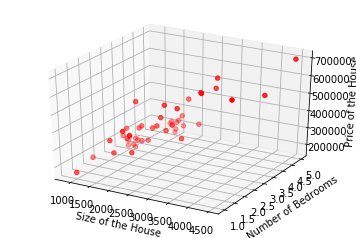

In [49]:
#Load the dataset
data = loadtxt('lab1data2.txt', delimiter=',')

#Plotting the data
fig = plt.figure()                                             # Display figure
ax = fig.add_subplot(111, projection='3d')                     # subplot and projection of points in 3D 
n = 100                                                        # n is 100 points on the plot
for c, m, zl, zh in [('r', 'o', -50, -25)]:
    xs = data[:, 0]                                            # x axis data
    ys = data[:, 1]                                            # y axis data 
    zs = data[:, 2]                                            # z axis data
    ax.scatter(xs, ys, zs, c=c, marker=m)                      # scatter point in 3D
ax.set_xlabel('Size of the House')                             # x-axis label
ax.set_ylabel('Number of Bedrooms')                            # y-axis label
ax.set_zlabel('Price of the House')                            # z-axis label
plt.show()                                                     # Display plot

X = data[:, :2]                                                # input X-matrix data                               
y = data[:, 2]                                                 # output vector y


### Solution Question 3b

In [50]:
#number of training samples
m = y.size                                                      # taking m as size of y
y.shape = (m, 1)                                                # vectorizing y with mX1 vector 

#Scale features and set them to zero mean 
x, mean_r, std_r = feature_normalize(X)                         # normalizing function of X

# Estimatiing features weights after normalization
intercept = False                                               
w = LinearReg(X,y,intercept)                                    # function call for LinearReg

print(w)                                                        # printing w vector

'''
Observation:: Weights got updated here

'''

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


'\nObservation:: Weights got updated here\n\n'

### Solution Question 4

In [51]:
# Since we require theta value here we write Cost function here
def compute_cost(X, y, theta):                        # Defining compute_cost function
    '''
    Computing cost for linear regression
    '''
    #Number of training samples                 
    m = y.size                                        # m as the size of y
    predictions = X.dot(theta)                        # prediction using X and theta  
    sqErrors = (predictions - y)                      # difference of y with predicted values of X
    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)    #squaring the difference
    return J


#Predict price of a 1650 sq-ft 3 br house using mean, standard deviation 

price = array([1.0,   ((1650.0 - mean_r[0]) / std_r[0]), ((3 - mean_r[1]) / std_r[1])]).dot(theta) 

print ('Predicted price of a 1650 sq-ft, 3 br house: %f' % (price))        # printing price


Predicted price of a 1650 sq-ft, 3 br house: 292679.071680


# IV. Gradient descent
We will now perform linear regression using gradient descent.

###  Prior idea of weights

In [52]:
# Estimatiing features
intercept = False
w = LinearReg(X,y,intercept)

print(w)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


### Solution Question 1

In [62]:
def compute_cost(X, y, theta):                        # Defining compute_cost function
    '''
    Computing cost for linear regression
    '''
    #Number of training samples                 
    m = y.size                                        # m as the size of y
    predictions = X.dot(theta)                        # prediction using X and theta  
    sqErrors = (predictions - y)                      # difference of y with predicted values of X
    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)    #squaring the difference
    return J


In [63]:
def gradient_descent(X, y, theta, alpha, num_iters):             # Defining gradient descent  function
    '''
    Performing gradient descent to learn theta
    by taking num_items gradient steps with learning rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))                      #  taking a zero vector 

    for i in range(num_iters):                                   # iterating it through all elements of the vector
        predictions = X.dot(theta)                               # find predicted values
        theta_size = theta.size                                  # theta size variable
        for it in range(theta_size):                             #  iterate over theta size
            temp = X[:, it]                                      #  creating a temp vector of X elements
            temp.shape = (m, 1)                                  #  shaping the vector size as mX1     
            errors_x1 = (predictions - y) * temp                 # find error vector 
            theta[it][0] = theta[it][0] - alpha * (1.0 / m) * errors_x1.sum()   # weight vector denoted as theta
        J_history[i, 0] = compute_cost(X, y, theta)              # calling compute_cost function
    return theta, J_history


In [64]:
#Load the dataset
data = loadtxt('lab1data2.txt', delimiter=',')                 # all elements of file are separated by delimiter

In [65]:
X = data[:, :2]                                                # X-data           
y = data[:, 2]                                                 # y-data

In [66]:
#number of training samples
m = y.size                                                     # taking mas size of y
y.shape = (m, 1)                                               # shaping y vector  as mX1

#Add a column of ones to X (interception data)
it = ones(shape=(m, 3))                                        # a vector od zeros and shaped mX3
it[:, 1:3] = x                                                 

In [67]:
#Some gradient descent settings
iterations = 50                                                # intializing iterations with value 50
alpha = 0.1                                                    # intializing alpha with 0.1

#Init Theta and Run Gradient Descent
theta = zeros(shape=(3, 1))                                    # theta is a zero vector with 3X1 vector
theta, J_history = gradient_descent(it, y, theta, alpha, iterations)   #calling gradient descent function
print (theta, J_history)                                       # printing JCostfunction values verses theta

(array([[338658.2492493 ],
       [103322.82942954],
       [  -474.74249522]]), array([[5.32682599e+10],
       [4.33890843e+10],
       [3.54574304e+10],
       [2.90805547e+10],
       [2.39470789e+10],
       [1.98095730e+10],
       [1.64710108e+10],
       [1.37742034e+10],
       [1.15935242e+10],
       [9.82841238e+09],
       [8.39825400e+09],
       [7.23834012e+09],
       [6.29666589e+09],
       [5.53139023e+09],
       [4.90881531e+09],
       [4.40177630e+09],
       [3.98835592e+09],
       [3.65085642e+09],
       [3.37497638e+09],
       [3.14915057e+09],
       [2.96401994e+09],
       [2.81200564e+09],
       [2.68696628e+09],
       [2.58392200e+09],
       [2.49883199e+09],
       [2.42841517e+09],
       [2.37000541e+09],
       [2.32143461e+09],
       [2.28093826e+09],
       [2.24707909e+09],
       [2.21868527e+09],
       [2.19480043e+09],
       [2.17464323e+09],
       [2.15757453e+09],
       [2.14307089e+09],
       [2.13070296e+09],
       [2.12011811e

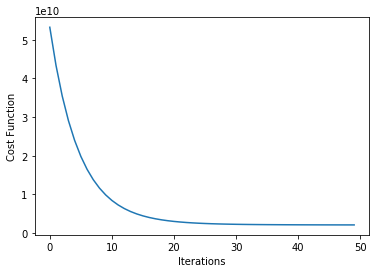

In [68]:
# Remember we are plotting here for alpha=0.01
# we can also plot for different values of alpha

plot(arange(iterations), J_history)                          # plotting cost function values vs no.of iterations
xlabel('Iterations')                                         # x-label
ylabel('Cost Function')                                      # y-label
show()                                                       # display plot


In [69]:
#Predict price of a 1650 sq-ft 3 br house using mean, standard deviation

price = array([1.0,   ((1650.0 - mean_r[0]) / std_r[0]), ((3 - mean_r[1]) / std_r[1])]).dot(theta)

print ('Predicted price of a 1650 sq-ft, 3 br house: %f' % (price))  # printing price


Predicted price of a 1650 sq-ft, 3 br house: 292679.071680


## Conclusion:  Result3 and Result4 are equal

In [70]:
# We can also use Machine Leaning inbult-functions and packages of Linear Regression 
# offered by 'scikit learn' in python

# References


[1] Prof. Yifei ZHANG's Class Notes  :: LinearRegression-Single-variable 

[2] Course era :: | Model Representation — Andrew Ng

a) Linear Regression With One Variable  https://www.youtube.com/watch?v=kHwlB_j7Hkc

b) Linear Regression With Multiple Variables  https://www.youtube.com/watch?v=Q4GNLhRtZNc&t=196s

[3] Github :: Haroon Ahmad's : LinearRegression-Multiple-variables : 
    https://github.com/haroon-ahmad/LinearRegression-Multiple-variables/blob/master/2.py

# CHEERS!